In [38]:
import csv
import pandas as pd
import geopandas

In [50]:
data = pd.read_csv("Opiod Deaths by county.csv")
data.head()

,County,count or rate label (s),Rank Color,Rank,suppressed drug type count,"rate or count visit/per 100,000 death label","rate or count visit/per 100,000 summary label",Year,Latitude (generated),Longitude (generated),County Avg Rate,County Total Count
0,Wood,6.8,37 to 54,40.0,5.0,"per 100,000","per 100,000",2018,44.4689,-90.0212,5.9,22.0
1,Winnebago,10.6,37 to 54,50.0,18.0,"per 100,000","per 100,000",2018,44.0677,-88.6452,11.7,99.0
2,Waushara,12.3,55 to 72,56.0,NaN,"per 100,000","per 100,000",2018,44.1173,-89.2418,6.6,8.0
3,Waupaca,11.6,37 to 54,54.0,6.0,"per 100,000","per 100,000",2018,44.4525,-88.9801,6.5,17.0
4,Waukesha,14.0,55 to 72,60.0,56.0,"per 100,000","per 100,000",2018,43.0181,-88.3044,12.7,252.0


In [51]:
data = pd.read_csv("Poverty by county.csv")
data.rename(columns = {"Geographic Area Name": "county", "Estimate!!Total!!Population for whom poverty status is determined": "population", "Estimate!!Below poverty level!!Population for whom poverty status is determined": "num_poverty",  "Estimate!!Percent below poverty level!!Population for whom poverty status is determined": "perc_poverty"}, inplace = True)

data.head()

,id,county,population,num_poverty,perc_poverty
0,0500000US55001,"Adams County, Wisconsin",18940,2794,14.8
1,0500000US55003,"Ashland County, Wisconsin",15088,2161,14.3
2,0500000US55005,"Barron County, Wisconsin",44390,5311,12.0
3,0500000US55007,"Bayfield County, Wisconsin",14838,1712,11.5
4,0500000US55009,"Brown County, Wisconsin",252305,26047,10.3


In [55]:
data = pd.read_csv("Pollution by county.csv", encoding = "utf-8")
data.head()
    

,FacName,FacStreet,FacCity,FacState,RegistryID,FacCounty,FacLat,FacLong,FacSNCFlg,FacQtrsWithNC,FacPenaltyCount,GHGCO2Releases,TRIReleasesTransfers,FacMapFlg,DFR URL
0,OAK CREEK GENERATING STATION (NORTH / ELM ROAD),4801 E ELM RD,OAK CREEK,WI,1.10064E+11,MILWAUKEE,42.849250,-87.832140,N,2.0,NaN,7944070.0,NaN,Y,https://echo.epa.gov/detailed-facility-report?...
1,ALLIANT ENERGY - WPL - COLUMBIA ENERGY CENTER,W8375 MURRAY RD,PARDEEVILLE,WI,1.1E+11,COLUMBIA,43.486100,-89.420400,N,0.0,NaN,7195816.0,428520.0,Y,https://echo.epa.gov/detailed-facility-report?...
2,OAK CREEK GENERATING STATION (SOUTH),11060 S CHICAGO RD,OAK CREEK,WI,1.1E+11,MILWAUKEE,42.845700,-87.829400,N,1.0,NaN,5112144.0,590334.0,Y,https://echo.epa.gov/detailed-facility-report?...
3,WESTON,2491 OLD HWY 51,KRONENWETTER,WI,1.10044E+11,MARATHON,44.858039,-89.644665,N,2.0,1.0,4164059.0,897247.0,Y,https://echo.epa.gov/detailed-facility-report?...
4,EDGEWATER GENERATING STATION,3739 LAKESHORE DRIVE,SHEBOYGAN,WI,1.1E+11,SHEBOYGAN,43.715592,-87.707750,N,2.0,NaN,3442633.0,219026.0,Y,https://echo.epa.gov/detailed-facility-report?...


In [54]:
data['FacCounty'].head()

0    MILWAUKEE
1     COLUMBIA
2    MILWAUKEE
3     MARATHON
4    SHEBOYGAN
Name: FacCounty, dtype: object

In [63]:
df = pd.read_csv('complete_clean_data.txt')

In [62]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('Pollution.db')
c = conn.cursor()
c.execute('CREATE TABLE Facilities (Year number, County text, Latitude number, Longitude number, Industry text, Release number )')
conn.commit()


In [66]:
state_df = geopandas.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
state_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"MULTIPOLYGON (((-133.65582 55.62562, -133.6249..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
3,08,01779779,0400000US08,08,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
4,09,01779780,0400000US09,09,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."


In [67]:
county_df = geopandas.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
county_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,04,015,00025445,0500000US04015,04015,Mohave,06,34475567011,387344307,"POLYGON ((-114.75562 36.08717, -114.75364 36.0..."
1,12,035,00308547,0500000US12035,12035,Flagler,06,1257365642,221047161,"POLYGON ((-81.52366 29.62243, -81.32406 29.625..."
2,20,129,00485135,0500000US20129,20129,Morton,06,1889993251,507796,"POLYGON ((-102.04195 37.02474, -102.04195 37.0..."
3,28,093,00695770,0500000US28093,28093,Marshall,06,1828989833,9195190,"POLYGON ((-89.72432 34.99521, -89.64428 34.995..."
4,29,510,00767557,0500000US29510,29510,St. Louis,25,160458044,10670040,"POLYGON ((-90.31821 38.60002, -90.30183 38.655..."


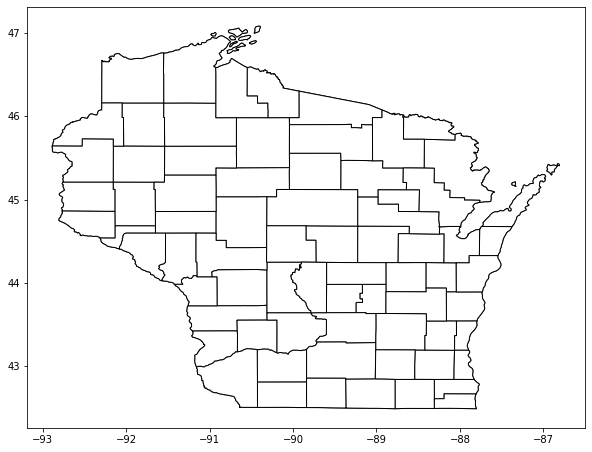

In [68]:
county_df = county_df.query("STATEFP == '55'")
fig, gax = plt.subplots(figsize=(10, 10))

state_df.query("NAME == 'Wisconsin'").plot(ax=gax, edgecolor="black", color="white")
county_df.plot(ax=gax, edgecolor="black", color="white")

plt.show()

In [83]:
temp=pd.read_csv('Area_avg_5year.csv')
temp = temp.drop(["Unnamed: 0"], axis = 1)
temp.index = ["2014", "2015", "2016", "2017", "2018"]

In [116]:
import statistics 
Co_re = {"County" : [], "avg" : []}
for c in temp.columns:
    Co_re["County"].append(c)
    Co_re["avg"].append(statistics.mean(list(temp[c])))

In [118]:
results = pd.DataFrame(Co_re)

In [120]:
results["County"] = results["County"].str.title()
results["County"] = results["County"].str.strip()
county_df["NAME"] = county_df["NAME"].str.title()
county_df["NAME"] = county_df["NAME"].str.strip()

In [122]:
res_w_states = county_df.merge(results, left_on="NAME", right_on="County", how="inner")

In [123]:
res_w_states

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,County,avg
0,55,035,01581077,0500000US55035,55035,Eau Claire,06,1652211310,18848512,"POLYGON ((-91.65045 44.85595, -90.92225 44.857...",Eau Claire,51.8902
1,55,113,01581116,0500000US55113,55113,Sawyer,06,3256410077,240690443,"POLYGON ((-91.55128 46.15704, -91.23838 46.157...",Sawyer,97.5822
2,55,101,01581111,0500000US55101,55101,Racine,06,861267826,1190381762,"POLYGON ((-88.30638 42.84210, -88.06992 42.843...",Racine,83.8914
3,55,097,01581109,0500000US55097,55097,Portage,06,2074100548,56938133,"POLYGON ((-89.84493 44.68494, -89.34592 44.681...",Portage,565.9984
4,55,135,01581127,0500000US55135,55135,Waupaca,06,1936525696,45266211,"POLYGON ((-89.22374 44.68136, -88.60516 44.678...",Waupaca,1404.5346
...,...,...,...,...,...,...,...,...,...,...,...,...
67,55,017,01581068,0500000US55017,55017,Chippewa,06,2611619746,85230103,"POLYGON ((-91.66565 45.20799, -91.54223 45.206...",Chippewa,63.3440
68,55,013,01581066,0500000US55013,55013,Burnett,06,2127856271,151932123,"POLYGON ((-92.88571 45.64602, -92.88399 45.654...",Burnett,1.0394
69,55,111,01581115,0500000US55111,55111,Sauk,06,2153654529,45723565,"POLYGON ((-90.31240 43.64099, -89.78581 43.641...",Sauk,422.2000
70,55,083,01581102,0500000US55083,55083,Oconto,06,2582755384,392746967,"POLYGON ((-88.67800 45.37868, -88.42810 45.377...",Oconto,43.1702
